In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

C:\Users\laika\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 2

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 5s - loss: 0.7532 - accuracy: 0.5703
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 1s 40ms/step - loss: 0.7302 - accuracy: 0.5304 - val_loss: 0.6755 - val_accuracy: 0.6141
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7235 - accuracy: 0.5781
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.6833 - accuracy: 0.5695 - val_loss: 0.6616 - val_accuracy: 0.5951
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6773 - accuracy: 0.5312
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.5450 - val_loss: 0.6486 - val_accuracy: 0.6522
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.5859
Epoch 4: savi

9/9 [==============================] - 0s 8ms/step - loss: 0.5377 - accuracy: 0.7075 - val_loss: 0.4628 - val_accuracy: 0.7446
Epoch 29/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5188 - accuracy: 0.7109
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 0.5429 - accuracy: 0.6903 - val_loss: 0.4584 - val_accuracy: 0.7636
Epoch 30/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5210 - accuracy: 0.7422
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.5389 - accuracy: 0.7021 - val_loss: 0.4548 - val_accuracy: 0.7799
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5456 - accuracy: 0.7422
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.5335 - accuracy: 0.7139 - val_loss: 0.4514

Epoch 56/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4127 - accuracy: 0.8047
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 0.4564 - accuracy: 0.7729 - val_loss: 0.3593 - val_accuracy: 0.8777
Epoch 57/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5657 - accuracy: 0.6641
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.4819 - accuracy: 0.7339 - val_loss: 0.3567 - val_accuracy: 0.8723
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4756 - accuracy: 0.7500
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.4684 - accuracy: 0.7611 - val_loss: 0.3549 - val_accuracy: 0.8696
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4646 - accuracy: 0.7422
Epoch 5

9/9 [==============================] - 0s 17ms/step - loss: 0.4301 - accuracy: 0.7811 - val_loss: 0.3153 - val_accuracy: 0.9076
Epoch 84/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.8281
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 0.4464 - accuracy: 0.7711 - val_loss: 0.3118 - val_accuracy: 0.9076
Epoch 85/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4663 - accuracy: 0.7109
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.4425 - accuracy: 0.7639 - val_loss: 0.3074 - val_accuracy: 0.9076
Epoch 86/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4568 - accuracy: 0.7578
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 0.4296 - accuracy: 0.7866 - val_loss: 0.

Epoch 111/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.7656
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 0.4078 - accuracy: 0.7838 - val_loss: 0.2720 - val_accuracy: 0.9158
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4780 - accuracy: 0.7656
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.4272 - accuracy: 0.7757 - val_loss: 0.2718 - val_accuracy: 0.9212
Epoch 113/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8594
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 0.3860 - accuracy: 0.8056 - val_loss: 0.2690 - val_accuracy: 0.9212
Epoch 114/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.7812

1/9 [==>...........................] - ETA: 0s - loss: 0.3730 - accuracy: 0.8281
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 0.3730 - accuracy: 0.8183 - val_loss: 0.2582 - val_accuracy: 0.9185
Epoch 139/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.7969
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 0.3978 - accuracy: 0.8029 - val_loss: 0.2598 - val_accuracy: 0.9103
Epoch 140/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3682 - accuracy: 0.8047
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 0.3911 - accuracy: 0.8047 - val_loss: 0.2572 - val_accuracy: 0.9158
Epoch 141/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8516
Epoch 141: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.8047
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 0.3927 - accuracy: 0.7965 - val_loss: 0.2444 - val_accuracy: 0.9049
Epoch 166/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8281
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 0.3795 - accuracy: 0.8220 - val_loss: 0.2436 - val_accuracy: 0.9158
Epoch 167/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8672
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 0.3504 - accuracy: 0.8401 - val_loss: 0.2414 - val_accuracy: 0.9158
Epoch 168/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4097 - accuracy: 0.7656
Epoch 168: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.4392 - accuracy: 0.8125
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 0.3664 - accuracy: 0.8256 - val_loss: 0.2351 - val_accuracy: 0.9212
Epoch 193/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.7969
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 0.3490 - accuracy: 0.8383 - val_loss: 0.2295 - val_accuracy: 0.9293
Epoch 194/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8047
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.3618 - accuracy: 0.8302 - val_loss: 0.2249 - val_accuracy: 0.9266
Epoch 195/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8672
Epoch 195: savi

1/9 [==>...........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.8125
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 0.3840 - accuracy: 0.8120 - val_loss: 0.2405 - val_accuracy: 0.9266
Epoch 220/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8281
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 0.3701 - accuracy: 0.8129 - val_loss: 0.2424 - val_accuracy: 0.9212
Epoch 221/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.7969
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 0.3541 - accuracy: 0.8311 - val_loss: 0.2378 - val_accuracy: 0.9293
Epoch 222/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8281
Epoch 222: savi

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9239


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 1s 634ms/step
[7.336462e-04 9.992663e-01]
1


# Confusion matrix

12/12 [==============================] - 0s 2ms/step


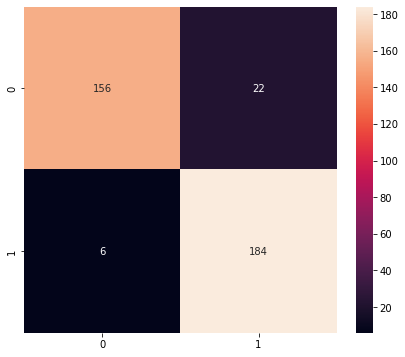

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       178
           1       0.89      0.97      0.93       190

    accuracy                           0.92       368
   macro avg       0.93      0.92      0.92       368
weighted avg       0.93      0.92      0.92       368



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\laika\AppData\Local\Temp\tmpxcvvxhz2\assets


6400

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3.96 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.336470e-04 9.992663e-01]
1
